## **Linearity of oncogenic protein & GAPDH**
> ### This code takes data from a high-throughput, automated Western blot assay and compares the linearity between sample concentration and detection of a target oncogenic protein. The POI is proprietary, but GAPDH was used as a control.

### **Importing Data**

In [1]:
# Ignore warnings
import warnings
warnings.filterwarnings('ignore')
import pandas as pd


# Convert CSV to Pandas dataframe
df = pd.read_csv(r"C:\Users\ryanr\OneDrive\Desktop\Cogent\Oncoprotein_Jess_Data.csv")
df

,Sample,Concentration,Capillary,GAPDH_area,oncoprotein_area,GAPDH_height,oncoprotein_height
0,"1,1",1.28,2,1238320.7,877290.9,213842.5,70407.2
1,"1,1",1.00,3,927529.7,767122.4,157697.9,66652.8
2,"1,1",0.50,4,129733.7,350011.5,21245.9,33078.6
3,"1,1",0.10,5,2095.2,55086.6,218.6,6106.1
4,"1,2",2.29,6,6010560.7,1489917.5,792510.7,91531.4
5,"1,2",1.00,7,2388445.6,993981.1,391526.3,81517.0
6,"1,2",0.50,8,417391.8,616205.6,75316.6,64777.8
7,"1,2",0.10,9,11097.5,122803.5,1836.6,12421.2
8,"1,3",1.85,10,5368986.2,1197708.7,759895.9,85382.8
9,"1,3",1.00,11,1965249.1,923201.1,326212.6,81009.2


### **Separating dataframe into Samples 1-1, 1-2, and 1-3**

In [2]:
# Sample 1-1
    # Plate wells 1-4
df_1_1 = df.iloc[:4,:]
display(df_1_1)

#Sample 1-2
    # Plate wells 5-8
df_1_2 = df.iloc[4:8,:]
display(df_1_2)

#Sample 1-3
    # Plate wells 9-12
df_1_3 = df.iloc[8:12,:]
display(df_1_3)

,Sample,Concentration,Capillary,GAPDH_area,oncoprotein_area,GAPDH_height,oncoprotein_height
0,"1,1",1.28,2,1238320.7,877290.9,213842.5,70407.2
1,"1,1",1.00,3,927529.7,767122.4,157697.9,66652.8
2,"1,1",0.50,4,129733.7,350011.5,21245.9,33078.6
3,"1,1",0.10,5,2095.2,55086.6,218.6,6106.1


,Sample,Concentration,Capillary,GAPDH_area,oncoprotein_area,GAPDH_height,oncoprotein_height
4,"1,2",2.29,6,6010560.7,1489917.5,792510.7,91531.4
5,"1,2",1.00,7,2388445.6,993981.1,391526.3,81517.0
6,"1,2",0.50,8,417391.8,616205.6,75316.6,64777.8
7,"1,2",0.10,9,11097.5,122803.5,1836.6,12421.2


,Sample,Concentration,Capillary,GAPDH_area,oncoprotein_area,GAPDH_height,oncoprotein_height
8,"1,3",1.85,10,5368986.2,1197708.7,759895.9,85382.8
9,"1,3",1.00,11,1965249.1,923201.1,326212.6,81009.2
10,"1,3",0.50,12,375198.6,577473.1,64011.3,57332.5
11,"1,3",0.10,13,4298.6,117411.2,665.0,12348.9


### **Creating x and y data from sample dataframes**

In [3]:
# Sample 1-1
x1 = df_1_1.Concentration
y1 = df_1_1.oncoprotein_area
y4 = df_1_1.GAPDH_area

# Sample 1-2
x2 = df_1_2.Concentration
y2 = df_1_2.oncoprotein_area
y5 = df_1_2.GAPDH_area

# Sample 1-3
x3 = df_1_3.Concentration
y3 = df_1_3.oncoprotein_area
y6 = df_1_3.GAPDH_area

In [4]:
# Display the data as it was created above

def display_xy_data(df, x_label, y_label_1, y_label_2):
    """
    This function creates dataframes with dynamic column names using a dictionary
    The arguments are the name of the dataframe column, and the labels for the columns
    """

    # Dictionary for creating dataframes with dynamic column names
    dynamic_df = {
        x_label: df.Concentration,
        y_label_1: df.oncoprotein_area,
        y_label_2: df.GAPDH_area
    }
    
    # Create dataframe from data dictionary (key becomes column name, value becomes column data)
    df = pd.DataFrame(dynamic_df)
    # Display each dataframe
    display(df)
    
    
# Dataframe names to pass into our function
    # Each dataframe contains one shared x column (concentration) and two y columns (oncoprotein, GAPDH)
dataframes = [df_1_1, df_1_2, df_1_3]

# Display data for each sample with proper headers
for idx, df in enumerate(dataframes, start=1):
    x_label = f'x{idx}'
    y_label_1 = f'y{idx}'
    y_label_2 = f'y{idx+3}'
    display_xy_data(df, x_label, y_label_1, y_label_2)

,x1,y1,y4
0,1.28,877290.9,1238320.7
1,1.00,767122.4,927529.7
2,0.50,350011.5,129733.7
3,0.10,55086.6,2095.2


,x2,y2,y5
4,2.29,1489917.5,6010560.7
5,1.00,993981.1,2388445.6
6,0.50,616205.6,417391.8
7,0.10,122803.5,11097.5


,x3,y3,y6
8,1.85,1197708.7,5368986.2
9,1.00,923201.1,1965249.1
10,0.50,577473.1,375198.6
11,0.10,117411.2,4298.6


### **Plotting the data**

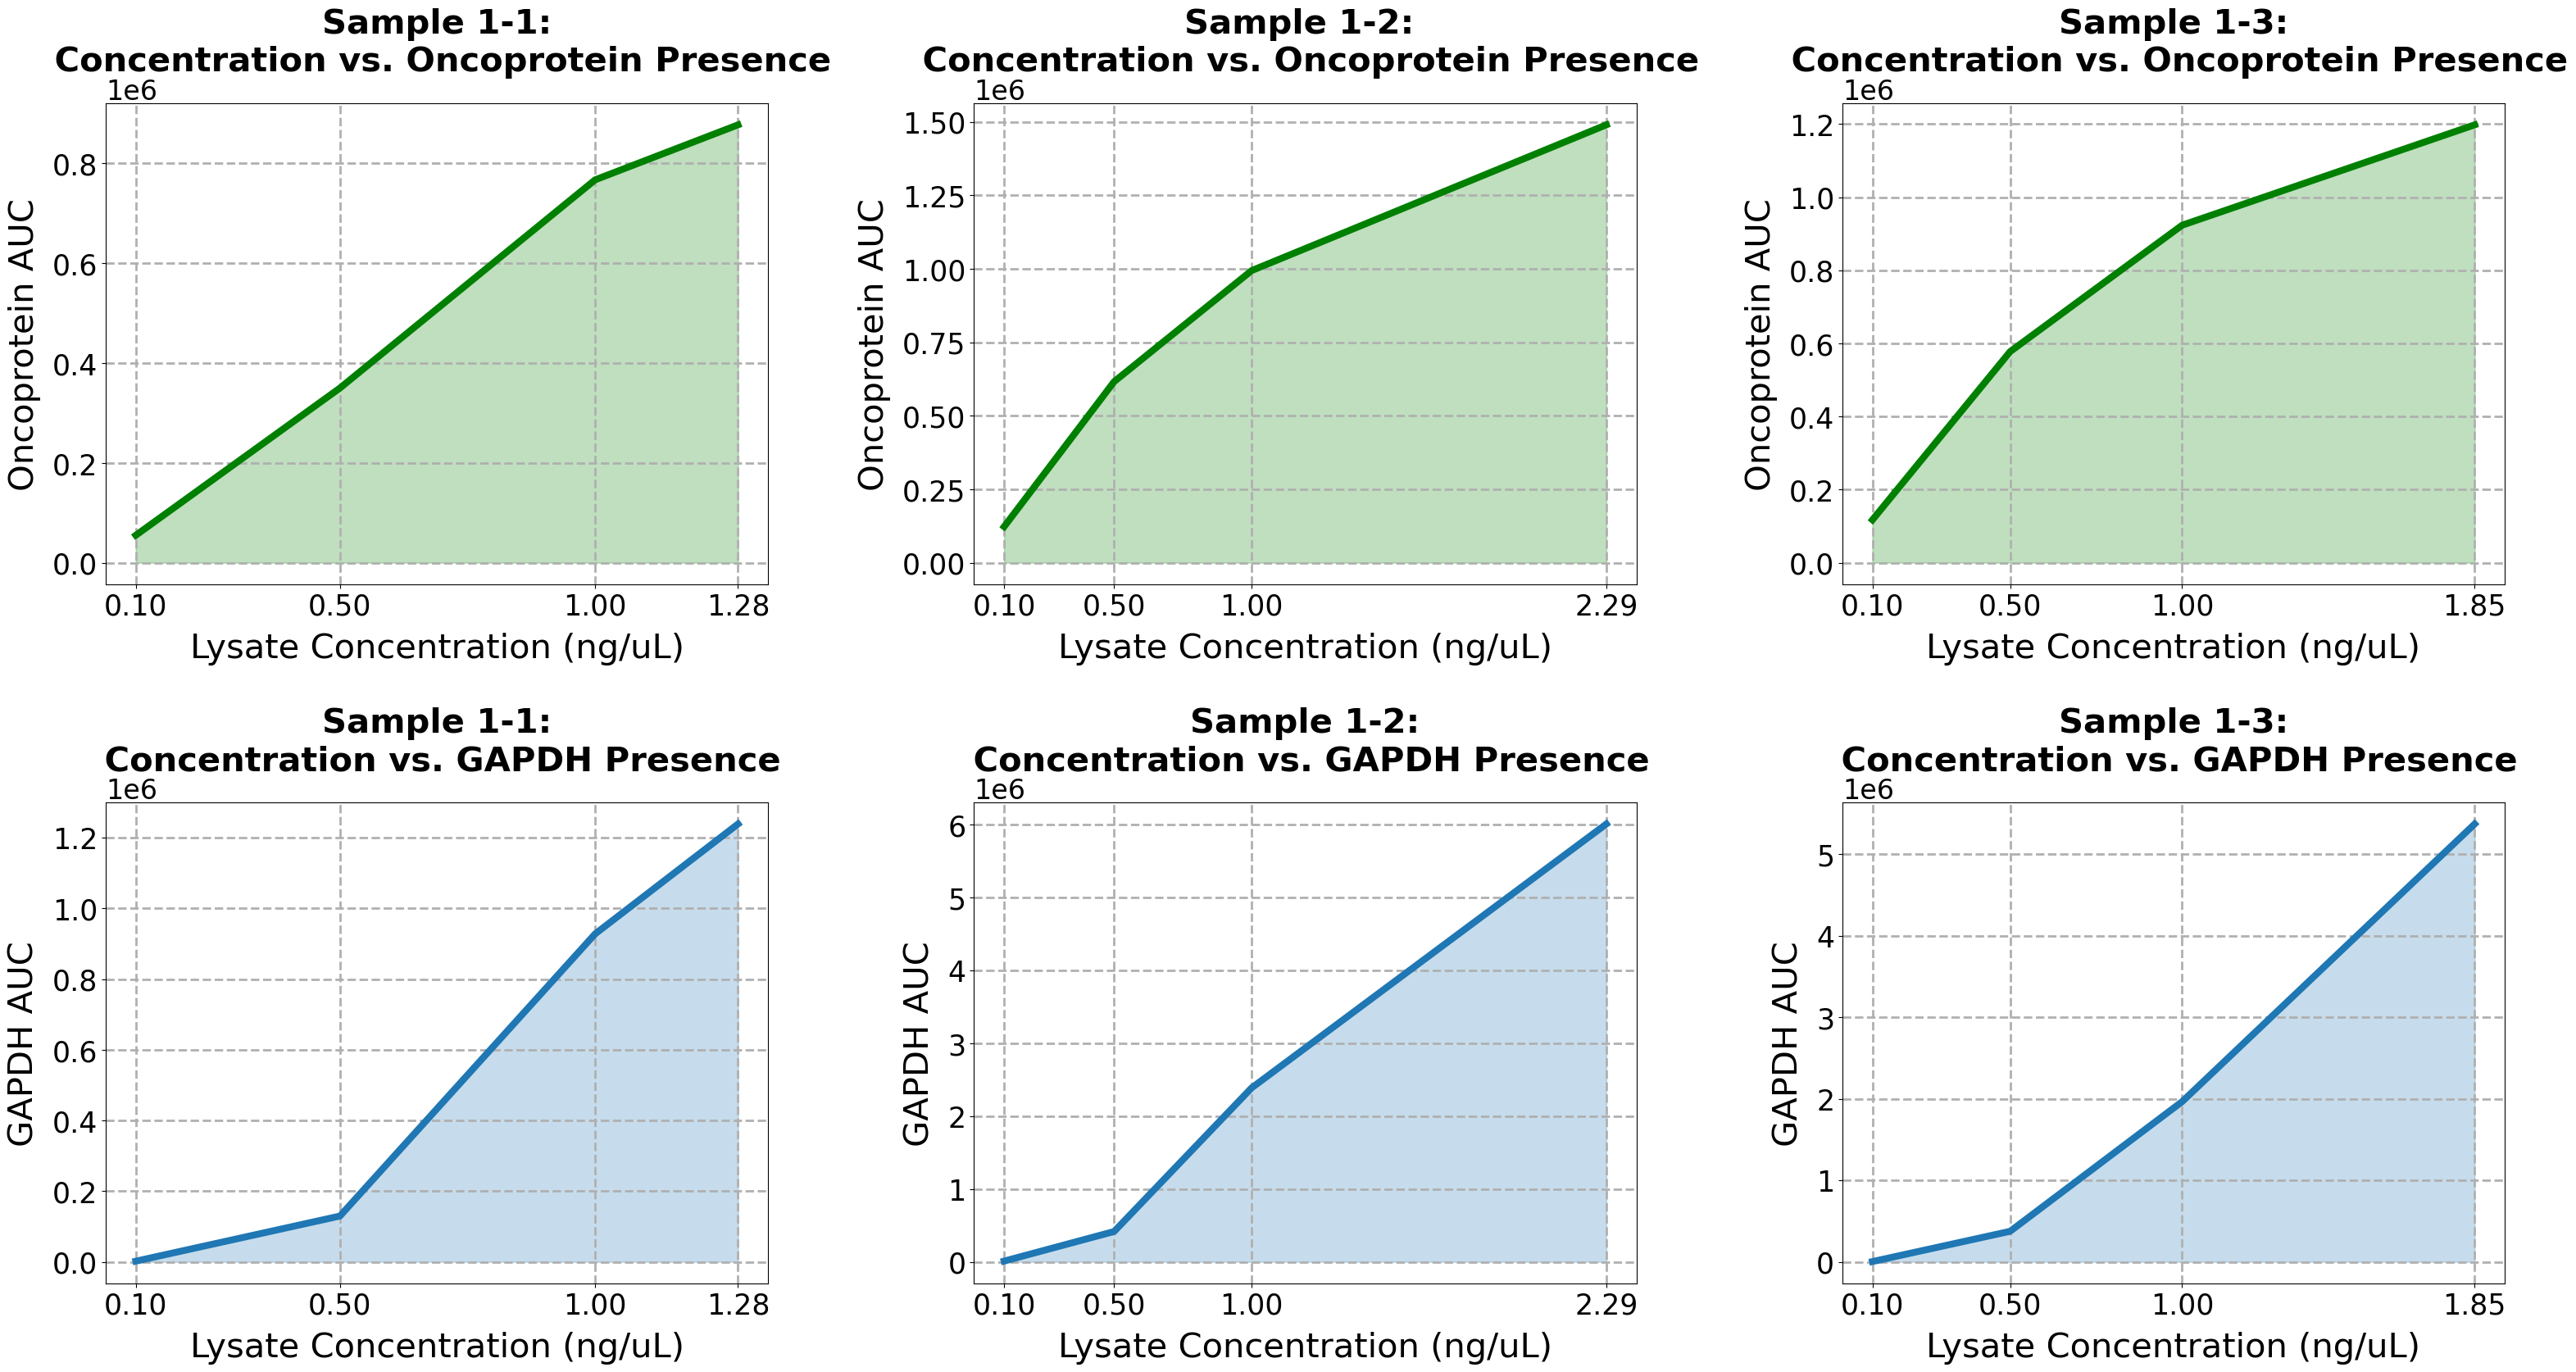

In [5]:
import matplotlib.pyplot as plt


# Initialize subplots
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(30, 15))
fig.tight_layout(w_pad=15, h_pad=17)

def plot_subplots(ax, x, y, title, ylabel, color):
    """
    This function creates 6 subplots: samples 1-1, 1-2 and 1-3 for oncoprotein and GAPDH
    The arguments are variables that change with each subplot
        They are created before calling the function by defining each and zipping through them
    """
    
    # Plot
    ax.plot(x, y, color=color, linewidth=6, marker='none')
    # Title
    ax.set_title(title, fontweight="bold", fontsize=30)
    # x-axis label
    ax.set_xlabel('Lysate Concentration (ng/uL)', fontsize=30, labelpad=10)
    # y-axis label
    ax.set_ylabel(ylabel, fontsize=30, labelpad=10)
    # Scientific notation (y-axis)
    ax.ticklabel_format(axis='y', style='sci', scilimits=(6,6))
    # Font size for "1e6"
    ax.yaxis.offsetText.set_fontsize(24)
    # Tick font size
    ax.tick_params(labelsize=25)
    # Label only the 4 concentrations used on the x-axis
    ax.set_xticks(x)
    # Grid
    ax.grid(linestyle='--', linewidth=2)
    # Color the AUC
    ax.fill_between(x, y, alpha=0.25, color=color)
    

# Data to pass into function
data = [(ax, x, y, title, ylabel, color) for ax, x, y, title, ylabel, color in zip(
        # Subplots
        axes.flat,
        # x data
        [x1, x2, x3, x1, x2, x3],
        # y data
        [y1, y2, y3, y4, y5, y6],
        # Titles
        ["Sample 1-1:\n Concentration vs. Oncoprotein Presence", "Sample 1-2: \n Concentration vs. Oncoprotein Presence", 
         "Sample 1-3:\n Concentration vs. Oncoprotein Presence", "Sample 1-1:\n Concentration vs. GAPDH Presence", 
         "Sample 1-2:\n Concentration vs. GAPDH Presence", "Sample 1-3:\n Concentration vs. GAPDH Presence"],
        # y labels
        ["Oncoprotein AUC", "Oncoprotein AUC", "Oncoprotein AUC", "GAPDH AUC", "GAPDH AUC", "GAPDH AUC"],
        # Colors
        ['green', 'green', 'green', 'tab:blue', 'tab:blue', 'tab:blue'])]


# Call function for each tuple element in data
for ax, x, y, title, ylabel, color in data:
    plot_subplots(ax, x, y, title, ylabel, color)

## **Analyzing the linearity of different concentration ranges:**
> ### 1. Split data into ranges
> ### 2. Fit a Linear Regression model to each range, and score each range
>> #### $R^{2}$ measures how well the data fits a linear regression model
> ### 3. Plot each range with its $R^2$ value

### **1. Splitting data into ranges:**
> #### Example highlighting different ranges

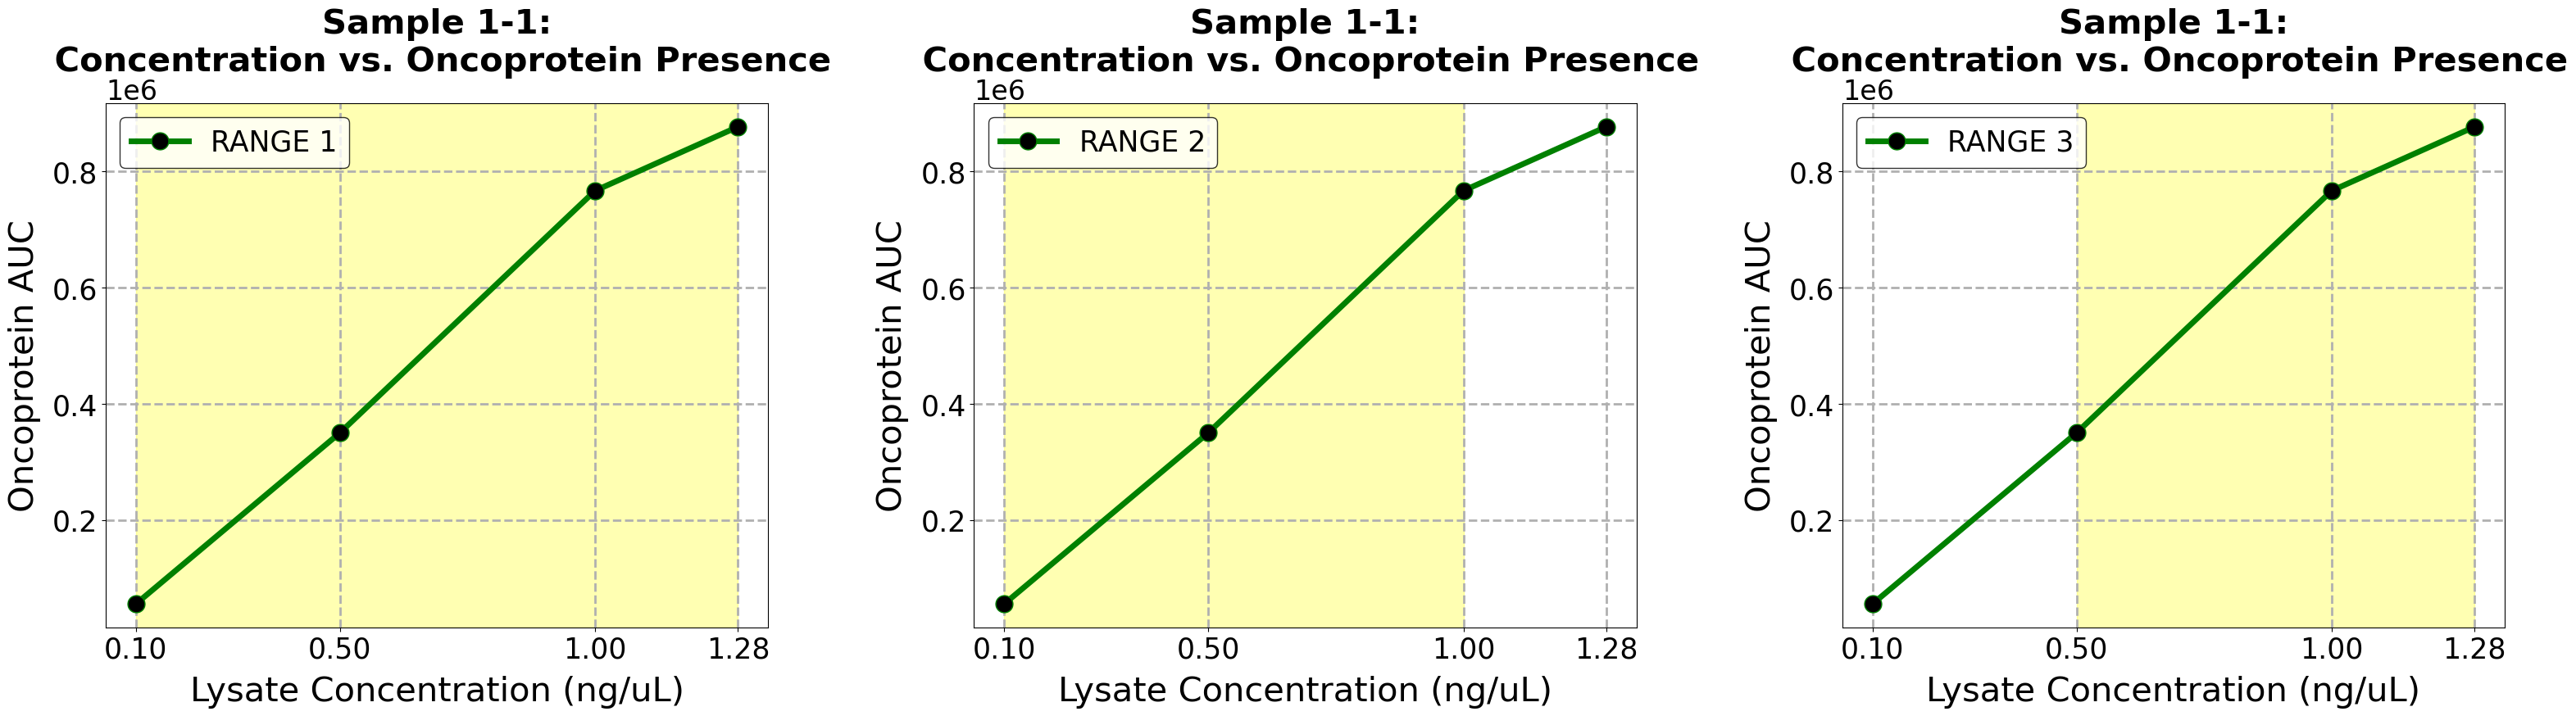

In [6]:
# Set x/y data for Sample 1-1
x = x1
y = y1

# Maximum x-axis data point
Max = x1[0]


# Initialize subplots
fig, axes = plt.subplots(1, 3, figsize=(30, 7))
fig.tight_layout(w_pad=15)

def plot_subplots(ax, RANGE, legend):
    """
    This function creates 3 subplots: samples 1-1 with 3 highlighted ranges
    The arguments are variables that change with each subplot
        They are created before calling the function by defining each and zipping through them
    """
    
    # Plot
    ax.plot(x, y, color='green', linewidth=5, marker='o', markersize=15, markerfacecolor='black', label=legend)
    # Legend location and font size
    legend = ax.legend(loc='upper left', fontsize=25)
    # Legend border & border color
    legend.get_frame().set_edgecolor('black')
    # Legend border width
    legend.get_frame().set_linewidth(1)
    # Title
    ax.set_title('Sample 1-1:\n Concentration vs. Oncoprotein Presence', fontweight="bold", fontsize=30)
    # x-axis label
    ax.set_xlabel('Lysate Concentration (ng/uL)', fontsize=30, labelpad=10)
    # y-axis label
    ax.set_ylabel('Oncoprotein AUC', fontsize=30, labelpad=10)
    # Scientific Notation (y-axis)
    ax.ticklabel_format(axis='y', style='sci', scilimits=(6,6))
    # Font size for "1e6"
    ax.yaxis.offsetText.set_fontsize(24)
    # Sets font size of ticks
    ax.tick_params(labelsize=25)
    # Label only the 4 concentrations used on the x-axis
    ax.set_xticks(x)
    # Grid
    ax.grid(linestyle='--', linewidth=2)
    # Highlight the range
    ax.axvspan(RANGE[0], RANGE[1], color='yellow', alpha=0.3)


# Data to pass into function
data = [(ax, RANGE, legend) for ax, RANGE, legend in zip(
        # Subplots
        axes.flat, 
        # Ranges
        [(0.1, Max), (0.1, 1.0), (0.5, Max)],
        # Legends for plots
        ['RANGE 1', 'RANGE 2', 'RANGE 3'])]


# Call function for each tuple element in data
for ax, RANGE, legend in data:
    plot_subplots(ax, RANGE, legend)

### **2. Calculating $R^2$ for each range across all 3 samples:**

In [7]:
import numpy as np
from sklearn.linear_model import LinearRegression


# RESHAPING DATA / DEFINING RANGES

# Oncoprotein sample 1-1
# Max concentration
Max1 = x1[0]
# Range 1-1
    # All datapoints
x_1_1 = np.array(x1).reshape((-1, 1))
y_1_1 = np.array(y1)
# Range 1-2
    # Exclude last datapoint (data is structured upside down)
x_1_2 = np.array(df_1_1.iloc[1:,:].Concentration).reshape((-1, 1))
y_1_2 = np.array(df_1_1.iloc[1:,:].oncoprotein_area)
# Range 1-3
    # Exclude first datapoint
x_1_3 = np.array(df_1_1.iloc[:3,:].Concentration).reshape((-1, 1))
y_1_3 = np.array(df_1_1.iloc[:3,:].oncoprotein_area)

# Oncoprotein sample 1-2
# Max concentration
Max2 = x2[4]
# Range 2-1
x_2_1 = np.array(df_1_2.Concentration).reshape((-1, 1))
y_2_1 = np.array(df_1_2.oncoprotein_area)
# Range 2-2
x_2_2 = np.array(df_1_2.iloc[1:,:].Concentration).reshape((-1, 1))
y_2_2 = np.array(df_1_2.iloc[1:,:].oncoprotein_area)
# Range 2-3
x_2_3 = np.array(df_1_2.iloc[:3,:].Concentration).reshape((-1, 1))
y_2_3 = np.array(df_1_2.iloc[:3,:].oncoprotein_area)

# Oncoprotein sample 1-3
# Max concentration
Max3 = x3[8]
# Range 3-1
x_3_1 = np.array(df_1_3.Concentration).reshape((-1, 1))
y_3_1 = np.array(df_1_3.oncoprotein_area)
# Range 3-2
x_3_2 = np.array(df_1_3.iloc[1:,:].Concentration).reshape((-1, 1))
y_3_2 = np.array(df_1_3.iloc[1:,:].oncoprotein_area)
# Range 3-3
x_3_3 = np.array(df_1_3.iloc[:3,:].Concentration).reshape((-1, 1))
y_3_3 = np.array(df_1_3.iloc[:3,:].oncoprotein_area)


# CALCULATING R^2

# Initializing dictionary of R^2 values
R2_values = {}

# Loop through re-shaped x/y data ranges and calculate R^2 for each range
# For each dataset (1-3)
for i in range(1, 4):
    
    # For each range (1-3)
    for j in range(1, 4):
        # Set range key
        RANGE = f"RANGE_{i}_{j}"
        # Fit linear regression model to dataset
        model = LinearRegression().fit(eval(f"x_{i}_{j}"), eval(f"y_{i}_{j}"))
        # Score the data against the model to obtain R^2
        R2 = model.score(eval(f"x_{i}_{j}"), eval(f"y_{i}_{j}"))
        # Store R^2 value in the dictionary, formatted to three decimal places as a string
        R2_values[RANGE] = f"{R2:.3f}"
        
print(R2_values)


# GET MAX R^2 VALUES

# Convert R2_values to floats for accuracy
float_R2s = {RANGE: float(R2) for RANGE, R2 in R2_values.items()}
# Dictionary of max R2 values for each sample/subplot row
max_R2s = {
    'Row_1': max(float_R2s['RANGE_1_1'], float_R2s['RANGE_1_2'], float_R2s['RANGE_1_3']),
    'Row_2': max(float_R2s['RANGE_2_1'], float_R2s['RANGE_2_2'], float_R2s['RANGE_2_3']),
    'Row_3': max(float_R2s['RANGE_3_1'], float_R2s['RANGE_3_2'], float_R2s['RANGE_3_3'])
}

{'RANGE_1_1': '0.990', 'RANGE_1_2': '0.999', 'RANGE_1_3': '0.974', 'RANGE_2_1': '0.926', 'RANGE_2_2': '0.980', 'RANGE_2_3': '0.971', 'RANGE_3_1': '0.918', 'RANGE_3_2': '0.979', 'RANGE_3_3': '0.955'}


### **3. Plotting each sample, range, and $R^2$ value:**

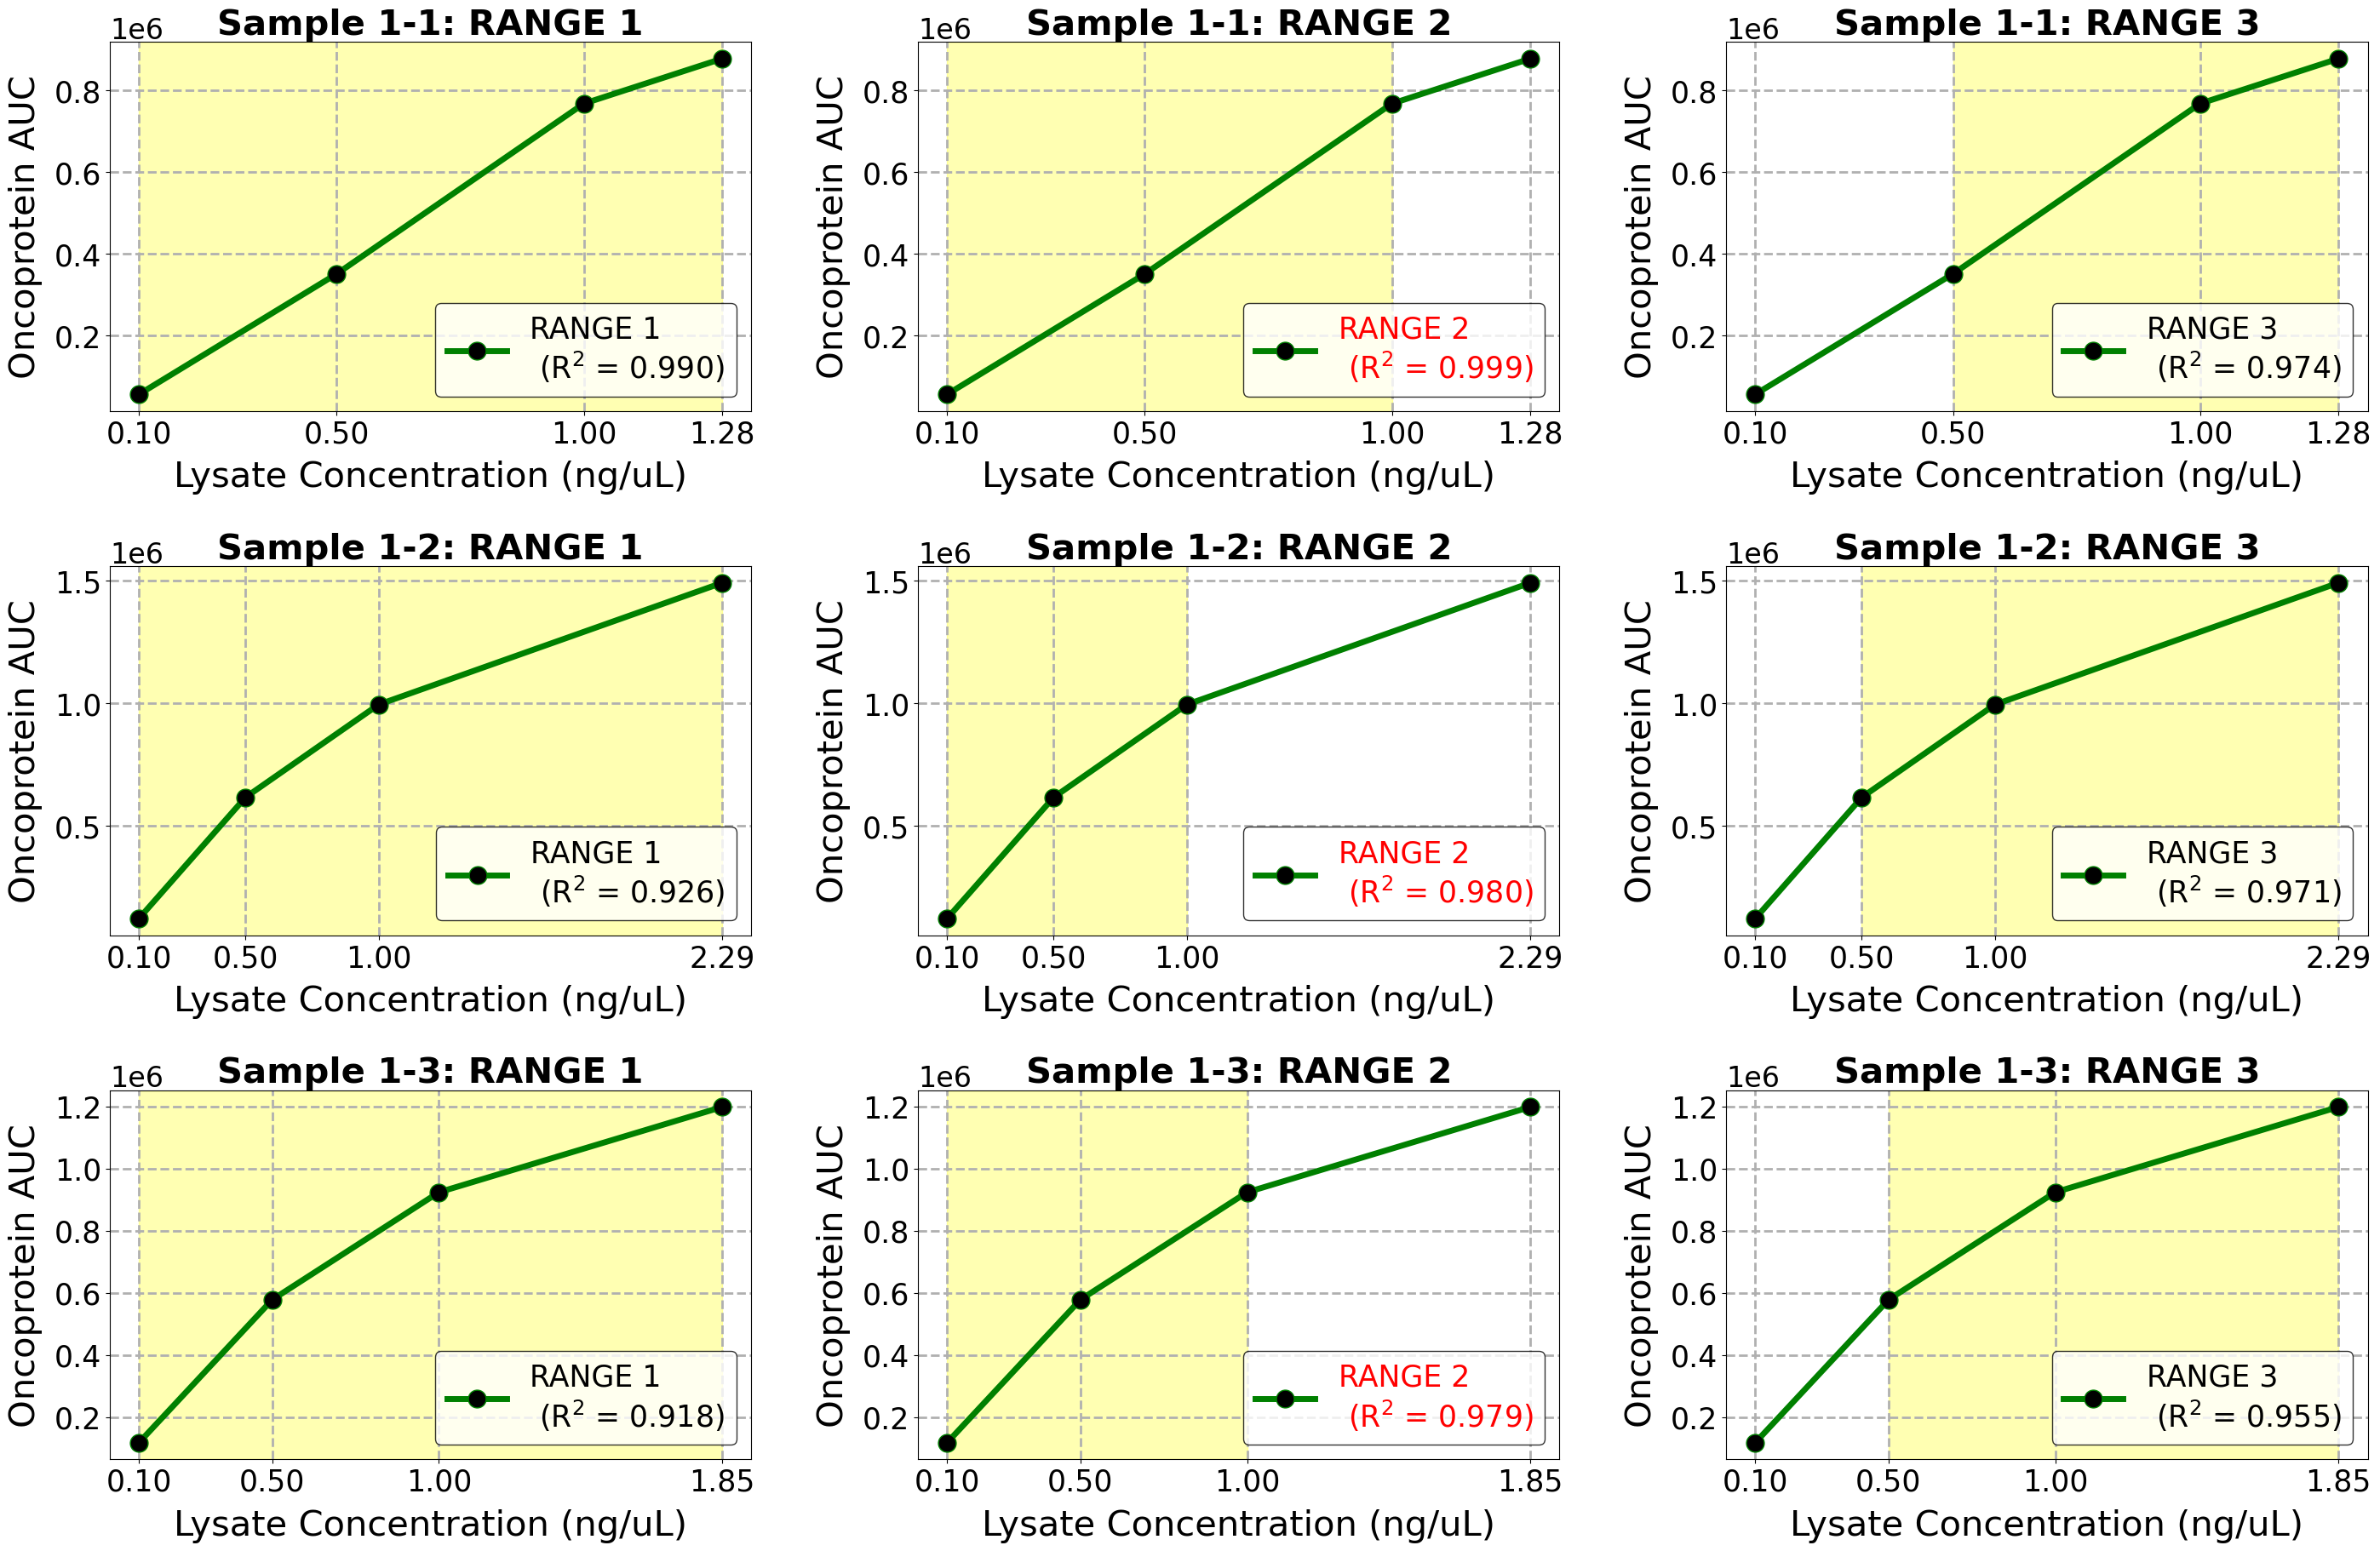

In [8]:
import itertools


# Initialize subplots
fig, axes = plt.subplots(3, 3, figsize=(30, 20))
fig.tight_layout(pad=11)

def plot_subplots(ax, x, y, title, RANGE, legend, R2, max_R2):
    """
    This function creates 9 subplots: samples 1-1, 1-2, and 1-3 with 3 highlighted ranges for each sample
    It displays the R^2 value for each range in the legend
        The max R^2 value per sample is shown in red text, indicating the range with highest linearity
    The arguments are variables that change with each subplot
        They are created before calling the function by defining each and zipping through them
    """
    
    # Plot
    ax.plot(x, y, color='green', linewidth=5, marker='o', markersize=15, markerfacecolor='black', label=legend + "\n (R$^2$ = " + R2 + ")")
    # Legend location and font size
    legend_obj = ax.legend(loc='lower right', fontsize=25)
    # Legend border & border color
    legend_obj.get_frame().set_edgecolor('black')
    # Legend border width
    legend_obj.get_frame().set_linewidth(1)
    # Title
    ax.set_title(title, fontweight="bold", fontsize=30)
    # x-axis label
    ax.set_xlabel('Lysate Concentration (ng/uL)', fontsize=30, labelpad=10)  # labelpad sets distance of axis label from tick labels
    # y-axis label
    ax.set_ylabel('Oncoprotein AUC', fontsize=30, labelpad=10)
    # Scientific Notation (y-axis)
    ax.ticklabel_format(axis='y', style='sci', scilimits=(6, 6))
    # Font size for "1e6"
    ax.yaxis.offsetText.set_fontsize(24)
    # Sets font size of ticks
    ax.tick_params(labelsize=25)
    # Labels only the 4 concentrations used on the x-axis
    ax.set_xticks(x)
    # Grid
    ax.grid(linestyle='--', linewidth=2)
    # Range visualization (x-axis)
    ax.axvspan(RANGE[0], RANGE[1], color='yellow', alpha=0.3)

    # Color legend text red if it is the max R^2 value for that row
    for text in legend_obj.get_texts():
        r2_value_in_text = float(text.get_text().split('=')[-1].strip()[:-1])
        # print(f'Checking if {r2_value_in_text} == {max_R2}')  # Debug statement
        if 'R$^2$' in text.get_text() and r2_value_in_text == max_R2:
            text.set_color('red')


# x/y data
x_data = [x1, x1, x1, x2, x2, x2, x3, x3, x3]
y_data = [y1, y1, y1, y2, y2, y2, y3, y3, y3]

# Subplot titles
titles = ['Sample 1-1: RANGE 1', 'Sample 1-1: RANGE 2', 'Sample 1-1: RANGE 3',
          'Sample 1-2: RANGE 1', 'Sample 1-2: RANGE 2', 'Sample 1-2: RANGE 3',
          'Sample 1-3: RANGE 1', 'Sample 1-3: RANGE 2', 'Sample 1-3: RANGE 3']

# Concentration ranges
RANGES = [(0.1, Max1), (0.1, 1.0), (0.5, Max1),
          (0.1, Max2), (0.1, 1.0), (0.5, Max2),
          (0.1, Max3), (0.1, 1.0), (0.5, Max3)]

# Legend labels
legend_labels = ['RANGE 1', 'RANGE 2', 'RANGE 3',
                 'RANGE 1', 'RANGE 2', 'RANGE 3',
                 'RANGE 1', 'RANGE 2', 'RANGE 3']


# Initialize data to pass into function
data = []
# (i, j) and product(range(1, 4), repeat=2) handles the R^2 values and legend
for ax, x, y, title, RANGE, legend, (i, j) in zip(axes.flat, x_data, y_data, titles, RANGES, legend_labels, itertools.product(range(1, 4), repeat=2)):
    # R^2
    R2 = R2_values[f"RANGE_{i}_{j}"]
    # Max R^2
    max_R2 = max_R2s[f"Row_{i}"]
    # Append to data
    data.append((ax, x, y, title, RANGE, legend, R2, max_R2))

    
# For each tuple element in data:
for ax, x, y, title, RANGE, legend, R2, max_R2 in data:
    plot_subplots(ax, x, y, title, RANGE, legend, R2, max_R2)

### Log Fit on Sample 1-2:

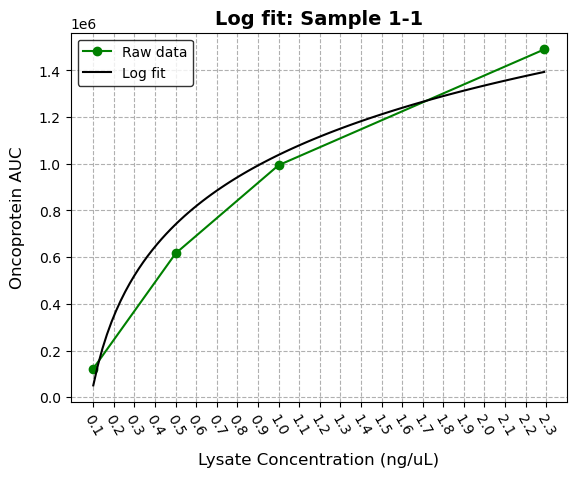

In [9]:
x = df_1_2.Concentration
y = df_1_2.oncoprotein_area

t = np.log(x)
p = np.polyfit(t, y, 1)
a = p[0]
b = p[1]
x_fitted = np.linspace(np.min(x), np.max(x), 100)
y_fitted = a * np.log(x_fitted) + b

ax = plt.axes()
ax.plot(x, y, marker='o', label='Raw data', color='g')
# Title
ax.set_title('Log fit: Sample 1-1', fontweight="bold", fontsize=14)
# x-axis label
ax.set_xlabel('Lysate Concentration (ng/uL)', fontsize=12, labelpad=10) # labelpad sets distance of axis label from tick labels
# y-axis label
ax.set_ylabel('Oncoprotein AUC', fontsize=12, labelpad=10)
plt.xticks(np.arange(min(x), max(x)+0.1, 0.1), rotation=-60)
ax.grid(linestyle='--')

# Log fit of degree 1
ax.plot(x_fitted, y_fitted, 'k', label='Log fit')
plt.legend()
# Legend location and font size
legend = ax.legend(loc='upper left', fontsize=10)
# Legend border & border color
legend.get_frame().set_edgecolor('black')
# Legend border width
legend.get_frame().set_linewidth(1)